In [1]:
#Importing Libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the weather data
weather_data = pd.read_csv('DataSet\weatherData.csv')

# Load the location data
location_data = pd.read_csv('DataSet\locationData.csv')


In [3]:
# Display the first few rows of each dataframe
weather_data.head()


,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,0.0,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,0.1,0.1,1,13.0,27.0,24,17.71,3.91,06:22,18:06
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,0.6,0.6,3,12.3,27.4,17,17.76,3.66,06:22,18:06
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,0.0,0.0,0,17.0,34.6,357,16.50,3.75,06:23,18:07
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,0.0,0.0,0,18.7,37.1,353,23.61,5.00,06:23,18:07


In [4]:
location_data.head()

,location_id,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation,city_name
0,0,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
1,1,7.065026,79.96622,19,19800,Asia/Colombo,530,Gampaha
2,2,6.572935,80.02519,5,19800,Asia/Colombo,530,Kalutara
3,3,7.275923,80.62659,499,19800,Asia/Colombo,530,Kandy
4,4,7.486819,80.52632,362,19800,Asia/Colombo,530,Matale


In [5]:
#Explore the Data
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142371 entries, 0 to 142370
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   location_id                      142371 non-null  int64  
 1   date                             142371 non-null  object 
 2   weather_code (wmo code)          142371 non-null  int64  
 3   temperature_2m_max (°C)          142371 non-null  float64
 4   temperature_2m_min (°C)          142371 non-null  float64
 5   temperature_2m_mean (°C)         142371 non-null  float64
 6   apparent_temperature_max (°C)    142371 non-null  float64
 7   apparent_temperature_min (°C)    142371 non-null  float64
 8   apparent_temperature_mean (°C)   142371 non-null  float64
 9   daylight_duration (s)            142371 non-null  float64
 10  sunshine_duration (s)            142371 non-null  float64
 11  precipitation_sum (mm)           142371 non-null  float64
 12  ra

In [6]:
weather_data.describe()

,location_id,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
count,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000
mean,13.000000,44.891586,29.295854,23.120601,25.730017,33.560477,26.362139,29.234477,43645.975220,34676.319743,5.442717,5.442717,7.337955,16.461730,37.118828,177.723567,18.933608,4.115296
std,7.788908,22.840879,3.352774,3.165760,2.954064,4.183799,4.196010,3.837440,1099.470021,8910.054804,10.286371,10.286371,6.861958,6.828743,11.676963,95.393165,4.398970,1.179600
min,0.000000,0.000000,14.100000,5.300000,12.100000,11.000000,2.000000,9.500000,41610.710000,0.000000,0.000000,0.000000,0.000000,2.300000,9.400000,0.000000,1.120000,0.380000
25%,6.000000,51.000000,27.700000,22.000000,24.700000,31.400000,25.100000,27.900000,42607.350000,32883.955000,0.200000,0.200000,1.000000,11.400000,28.100000,78.000000,16.570000,3.350000
50%,13.000000,53.000000,29.300000,23.800000,26.200000,33.900000,27.600000,30.100000,43648.880000,38819.230000,1.800000,1.800000,6.000000,15.600000,35.300000,209.000000,19.710000,4.110000
75%,20.000000,61.000000,31.300000,25.200000,27.600000,36.300000,29.100000,31.600000,44685.075000,39898.010000,6.500000,6.500000,12.000000,20.400000,44.300000,247.000000,22.090000,4.890000
max,26.000000,65.000000,40.300000,30.300000,32.700000,46.100000,35.600000,37.700000,45676.100000,42231.340000,321.800000,321.800000,24.000000,60.700000,123.500000,360.000000,29.400000,8.450000


### Data Cleaning and Preprocessing

In [7]:
#Merge the DataFrames
merged_data = pd.merge(weather_data, location_data, on='location_id')  


In [8]:
#Verify the Merged Data
merged_data.head()


,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,et0_fao_evapotranspiration (mm),sunrise,sunset,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation,city_name
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,4.61,06:22,18:05,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,3.91,06:22,18:06,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,3.66,06:22,18:06,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,3.75,06:23,18:07,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,5.00,06:23,18:07,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo


In [9]:
# Columns to drop that are irrelevant for training 
columns_to_drop = [
    'location_id', 'weather_code (wmo code)', 'latitude', 'longitude', 
    'elevation', 'utc_offset_seconds', 'timezone_abbreviation', 
    'city_name', 'sunrise', 'sunset', 'daylight_duration (s)', 
    'sunshine_duration (s)', 'precipitation_sum (mm)', 'precipitation_hours (h)'
]

# Drop the unwanted columns
merged_data = merged_data.drop(columns=columns_to_drop)


In [10]:
# Check the resulting dataset after dropping the unwanted columns
print("\nMerged Data (after dropping unwanted columns):")
merged_data.head()


Merged Data (after dropping unwanted columns):


,date,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),timezone
0,1/1/2010,30.1,22.6,26.0,34.5,25.0,29.0,0.0,12.2,27.4,19,20.92,4.61,Asia/Colombo
1,1/2/2010,30.1,23.7,26.3,33.9,26.1,29.7,0.1,13.0,27.0,24,17.71,3.91,Asia/Colombo
2,1/3/2010,29.6,23.1,26.0,34.5,26.2,29.9,0.6,12.3,27.4,17,17.76,3.66,Asia/Colombo
3,1/4/2010,28.9,23.1,25.7,31.7,26.1,28.4,0.0,17.0,34.6,357,16.50,3.75,Asia/Colombo
4,1/5/2010,28.1,21.3,24.6,30.0,22.9,26.2,0.0,18.7,37.1,353,23.61,5.00,Asia/Colombo


#### Handling missing values

In [11]:
# Check for missing values in the remaining columns
merged_data.isnull().sum()

date                               0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
rain_sum (mm)                      0
wind_speed_10m_max (km/h)          0
wind_gusts_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
shortwave_radiation_sum (MJ/m²)    0
et0_fao_evapotranspiration (mm)    0
timezone                           0
dtype: int64

In [12]:
# Fill or drop missing values if necessary
merged_data = merged_data.dropna() 


In [13]:
# Convert 'date' column to datetime format if it exists and set it as index for time series data
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.set_index('date', inplace=True)

#### Scaling the relevant features

In [14]:
# Define the columns to scale (excluding the target variable)
columns_to_scale = [
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'temperature_2m_mean (°C)',
    'apparent_temperature_max (°C)',
    'apparent_temperature_min (°C)',
    'apparent_temperature_mean (°C)',
    'wind_speed_10m_max (km/h)',
    'wind_gusts_10m_max (km/h)',
    'shortwave_radiation_sum (MJ/m²)',
    'et0_fao_evapotranspiration (mm)'
]

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
merged_data[columns_to_scale] = scaler.fit_transform(merged_data[columns_to_scale])


In [15]:
# Display the scaled data
merged_data[columns_to_scale].head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
date,,,,,,,,,,
2010-01-01,0.239846,-0.164448,0.091394,0.224563,-0.324628,-0.061103,-0.624089,-0.832311,0.451560,0.419385
2010-01-02,0.239846,0.183021,0.192950,0.081152,-0.062474,0.121311,-0.506937,-0.866566,-0.278159,-0.174039
2010-01-03,0.090715,-0.006507,0.091394,0.224563,-0.038641,0.173430,-0.609445,-0.832311,-0.266792,-0.385976
2010-01-04,-0.118068,-0.006507,-0.010161,-0.444687,-0.062474,-0.217457,0.078824,-0.215710,-0.553224,-0.309679
2010-01-05,-0.356677,-0.575093,-0.382531,-0.851018,-0.825106,-0.790758,0.327773,-0.001612,1.063069,0.750006


### Data Visualization 

#### Line Plot of Temperature Over Time
Visualize how the temperature changes over time with a line plot.

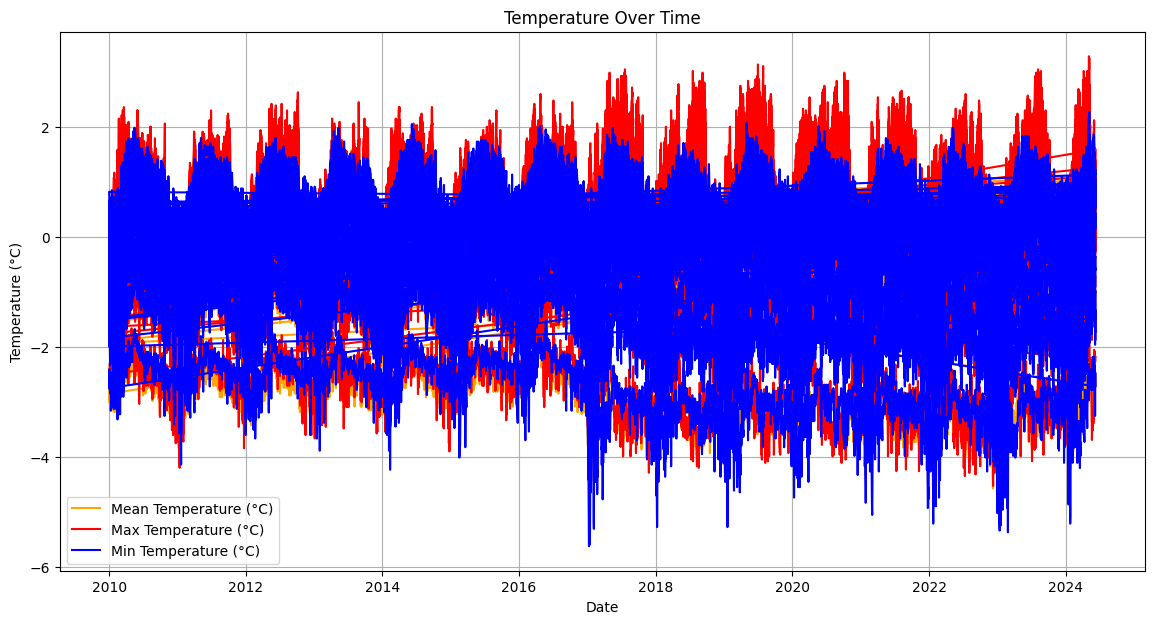

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['temperature_2m_mean (°C)'], label='Mean Temperature (°C)', color='orange')
plt.plot(merged_data.index, merged_data['temperature_2m_max (°C)'], label='Max Temperature (°C)', color='red')
plt.plot(merged_data.index, merged_data['temperature_2m_min (°C)'], label='Min Temperature (°C)', color='blue')

plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


#### Histogram of Temperature Distributions
A histogram can show the distribution of temperatures

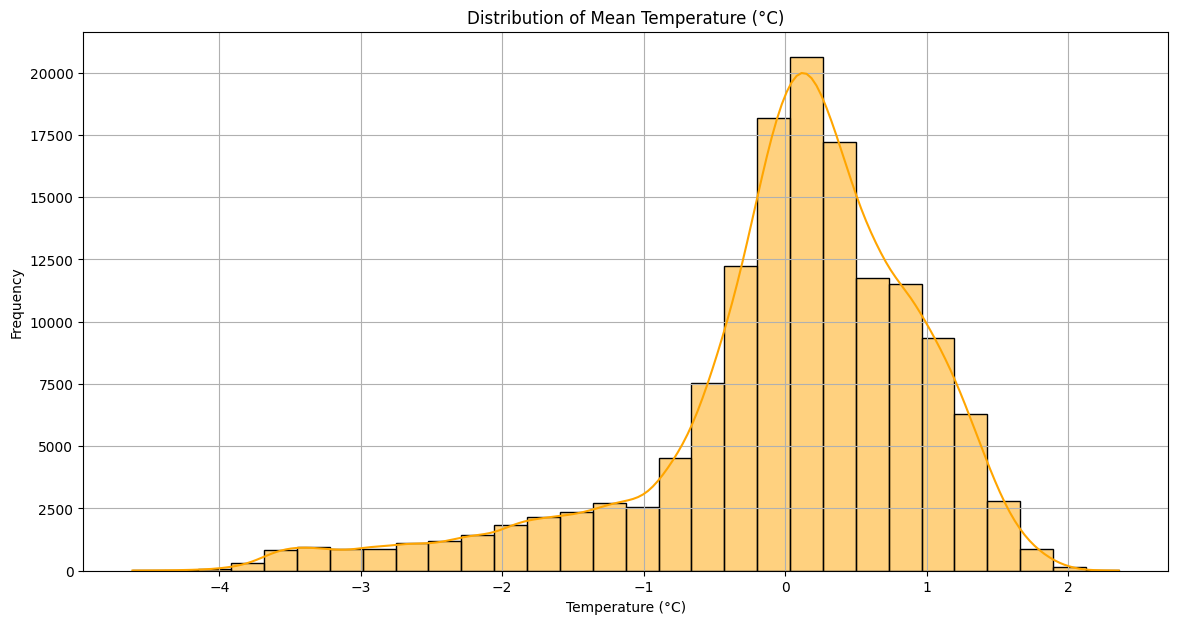

In [17]:
plt.figure(figsize=(14, 7))
sns.histplot(merged_data['temperature_2m_mean (°C)'], bins=30, kde=True, color='orange')
plt.title('Distribution of Mean Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid()
plt.show()



##### Correlation Heatmap
You can visualize correlations between different features using a heatmap.

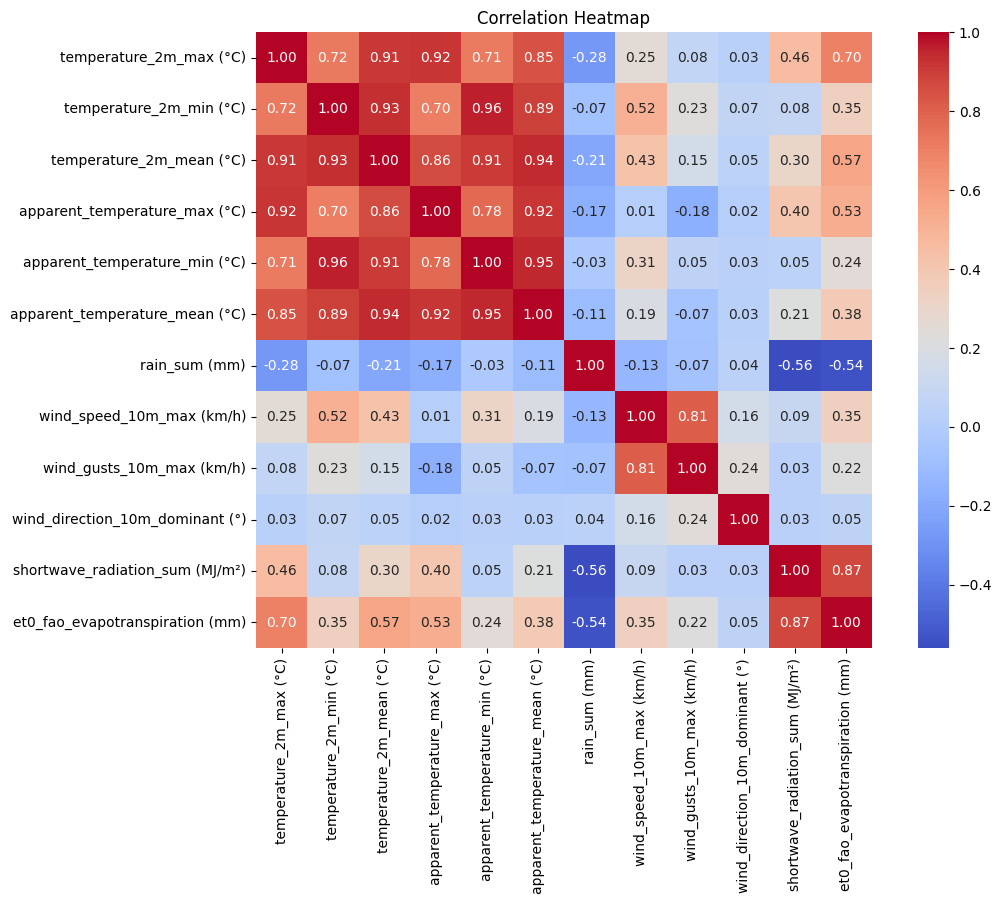

In [18]:
# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()



### Splitting the Data into Training and Test Sets

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
# Define the target (temperature you're trying to predict) and features (input variables)
target = 'temperature_2m_mean (°C)'  # Predicting future temperatures

# Define the relevant features (excluding the target)
features = [
    'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 
    'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)', 
    'apparent_temperature_mean (°C)', 'wind_speed_10m_max (km/h)', 
    'wind_gusts_10m_max (km/h)', 'shortwave_radiation_sum (MJ/m²)', 
    'et0_fao_evapotranspiration (mm)'  # Add more relevant features if necessary
]

In [26]:
# Prepare the feature matrix (X) and the target vector (y)
X = merged_data[features]  # Features to use for prediction
y = merged_data[target]    # Target variable (mean temperature)

In [27]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Output shapes for confirmation
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (113896, 9)
Test set shape: (28475, 9)


## Implementing LSTM
### Reshape Data for LSTM

In [29]:
# Reshape the data into 3D (samples, timesteps, features)
# Assuming we're using a window of past `n_steps` to predict the next value

def create_lstm_dataset(X, y, n_steps):
    X_lstm, y_lstm = [], []
    for i in range(n_steps, len(X)):
        X_lstm.append(X[i-n_steps:i])
        y_lstm.append(y[i])
    return np.array(X_lstm), np.array(y_lstm)

n_steps = 10  # Choose a window size for the time steps
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train, y_train, n_steps)
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test, y_test, n_steps)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4740\2543288709.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_lstm.append(y[i])


In [30]:
# Print the shapes to verify
print(f"Training data shape: {X_train_lstm.shape}, {y_train_lstm.shape}")
print(f"Test data shape: {X_test_lstm.shape}, {y_test_lstm.shape}")


Training data shape: (113886, 10, 9), (113886,)
Test data shape: (28465, 10, 9), (28465,)


### Build the LSTM Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer for output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,251 (125.98 KB)

 Trainable params: 32,251 (125.98 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [33]:
# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 137s 35ms/step - loss: 0.9962 - val_loss: 1.0038
Epoch 2/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 108s 25ms/step - loss: 0.9903 - val_loss: 1.0037
Epoch 3/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 90s 25ms/step - loss: 0.9879 - val_loss: 1.0034
Epoch 4/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 87s 24ms/step - loss: 0.9926 - val_loss: 1.0034
Epoch 5/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 138s 23ms/step - loss: 0.9962 - val_loss: 1.0034
Epoch 6/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 145s 24ms/step - loss: 0.9958 - val_loss: 1.0038
Epoch 7/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 141s 24ms/step - loss: 0.9980 - val_loss: 1.0033
Epoch 8/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 141s 23ms/step - loss: 0.9952 - val_loss: 1.0036
Epoch 9/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 140s 23ms/step - loss: 0.9999 - val_loss: 1.0035
Epoch 10/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 1.0091 - val_loss: 1.0051
Epoch 11/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 87s 24ms/step - loss: 0.9990 - val_loss: 1.0053
E

KeyboardInterrupt: 